In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import requests
import os
from dotenv import load_dotenv
import folium
import json


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           122 non-null    float64
 1   eating_out     125 non-null    int64  
 2   employment     116 non-null    float64
 3   ethnic_food    125 non-null    int64  
 4   exercise       112 non-null    float64
 5   fruit_day      125 non-null    int64  
 6   income         124 non-null    float64
 7   on_off_campus  124 non-null    float64
 8   pay_meal_out   125 non-null    int64  
 9   sports         123 non-null    float64
 10  veggies_day    125 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.9 KB
null values: 0


C:\Users\Judyc\AppData\Local\Temp\ipykernel_8392\901184555.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


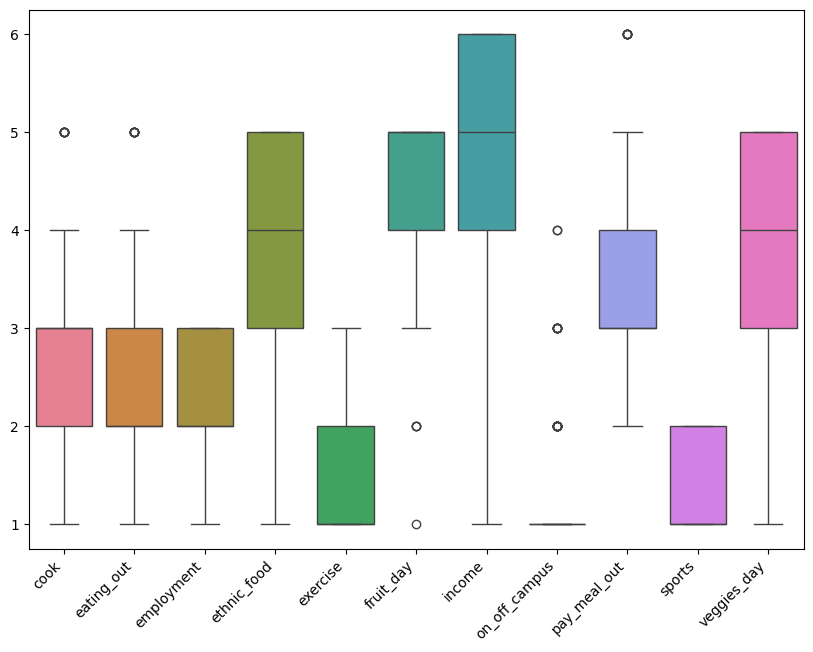

In [2]:
raw_df = pd.read_csv('food_coded.csv')

df = raw_df[["cook", "eating_out", "employment", "ethnic_food", "exercise", "fruit_day", "income", "on_off_campus", "pay_meal_out", "sports", "veggies_day"]]

df.head()
df.info()
# print(f"null values: \n{df.isna().sum()}")

clean_df = df.dropna()
print(f"null values: {clean_df.isna().sum().sum()}")
clean_df.head()

# data exploration

fig = plt.figure(figsize=(10,7))
ax = seaborn.boxplot(clean_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()





[3 3 0 1 0 4 0 2 0 0 0 1 0 0 3 2 3 2 3 4 3 1 3 4 3 4 1 4 2 1 3 0 3 4 3 3 3
 2 0 2 3 2 3 0 3 0 3 0 0 4 3 0 0 4 3 3 4 2 0 2 0 2 2 4 4 0 3 4 3 0 1 0 3 2
 3 4 4 1 3 4 3 3 2 1 2 2 3 4 4 4 0 4 3 3 2 2 2 2 1 3]
[[-1.00193977  0.06447347  0.17802365  0.67744381 -0.54955638  0.61003196
   0.24509319  0.25958653 -0.0288681  -0.54320214  0.63550052]
 [ 0.66403989 -0.06869822  0.40408542  0.72278811  1.73653859 -0.14911892
  -0.15538588 -0.50390326 -0.41094584  0.89686592 -0.08250165]
 [ 0.02859502 -0.42495063 -0.54477912  0.14047186  0.27936371  0.5792093
  -1.00693084  0.23279741 -0.26347724  0.81104143  0.685325  ]
 [ 0.76488382  0.26045361  0.36397768 -0.33622066 -0.69440405  0.11256074
   0.47762942 -0.32329277  0.22174204 -0.66616811 -0.15714909]
 [-0.43096779 -0.04211222 -0.44662072 -0.71868326  0.66736885 -1.39857854
   0.01745246  0.23279741  0.12977237  0.48000411 -1.12568683]]


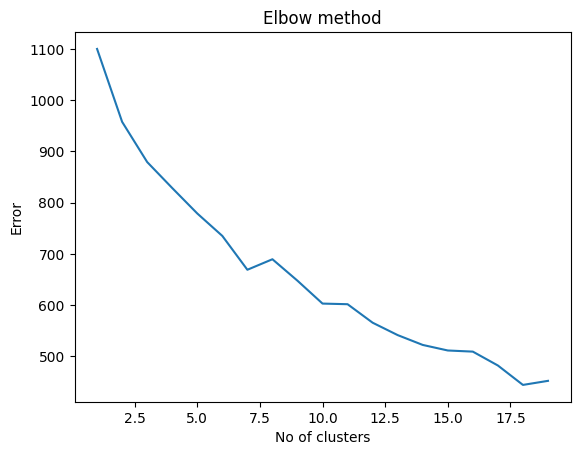

In [3]:
# k means clustering
scaler = StandardScaler()
X = scaler.fit_transform(clean_df)

kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)
print(kmeans5.cluster_centers_)

# elbow method
# find optimal number of clusters in the dataset

error = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i).fit(X)
    error.append(kmeans.inertia_)
plt.plot(range(1, 20), error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()



[4 4 4 4 4 1 4 2 0 0 4 4 3 4 1 0 2 4 1 2 2 4 2 1 2 1 3 4 0 1 2 4 3 4 4 3 4
 0 4 4 4 0 3 3 3 3 4 4 3 1 3 3 0 1 3 2 4 0 2 4 3 0 4 1 1 4 2 1 1 4 4 4 2 0
 2 1 1 0 4 1 2 3 0 4 0 4 2 1 1 1 3 1 1 2 0 0 0 0 0 3]

--> row 0 is cluster 4... all E [0,1,2,3,4]

[[2.66666667 2.22222222 2.27777778 4.27777778 1.72222222 4.77777778
  2.72222222 1.66666667 3.11111111 1.61111111 4.88888889]
 [2.65       2.75       2.35       2.85       1.95       3.
  4.3        1.35       3.55       1.55       2.4       ]
 [3.66666667 1.73333333 2.53333333 3.06666667 1.06666667 4.53333333
  5.8        1.         4.46666667 1.06666667 3.93333333]
 [2.75       4.25       2.6875     4.1875     1.25       4.75
  5.4375     1.5        3.5        1.1875     4.25      ]
 [2.4516129  2.03225806 2.4516129  3.87096774 1.74193548 4.35483871
  5.06451613 1.29032258 3.03225806 1.29032258 4.35483871]]

  --> shape is (5, 11), 5 rows, 11 columns (features)
  
  each row in cluster_centers_ is a cluster, and each element in that row is the mean of one feature for that cluster
  

[4 2 2 3 4 1 0 3 0 2 2 0 2 0 4 2 0 3 4 4 0 2 4 4 0 3 1 2 5 1 0 4 0 3 0 0 0
 2 2 2 0 1 0 0 4 0 4 2 0 3 4 0 2 3 2 0 3 2 2 2 4 1 2 4 4 4 0 3 1 0 3 0 4 2
 0 3 4 1 0 3 0 5 2 2 2 2 0 3 1 3 3 3 1 4 1 2 2 2 1 4]
[[ 0.49404966 -0.08812646  0.81056187  0.26934513 -0.60110951  0.43359195
   0.63324982 -0.28855999  0.12788175 -0.73379939  0.33155447]
 [ 0.49744193  0.18846091  1.02575529  0.19514537  0.58976782 -0.46362429
  -1.39323027  0.00508993  0.60792814  0.79097856 -0.39348348]
 [-0.28956385 -0.4028638  -0.91098547  0.70883602  0.13610027  0.51618089
  -0.53122008  0.14212656 -0.1954148   0.07257357  0.74948028]
 [-0.55543272  0.03864275 -0.37300192 -0.4958399   0.95837272 -0.67103516
   0.60552435  0.02099597 -0.1190809   1.23173468 -0.83080168]
 [-0.12459258  0.43643578 -0.25030392 -1.14826082 -0.57424762 -0.55095518
   0.13127282 -0.20922299 -0.26347724 -0.62345361 -0.60144656]
 [ 0.23284516  0.89105639  1.02575529  1.08554249  0.58976782  0.80524219
   0.24509319  3.69529057  0.99000589

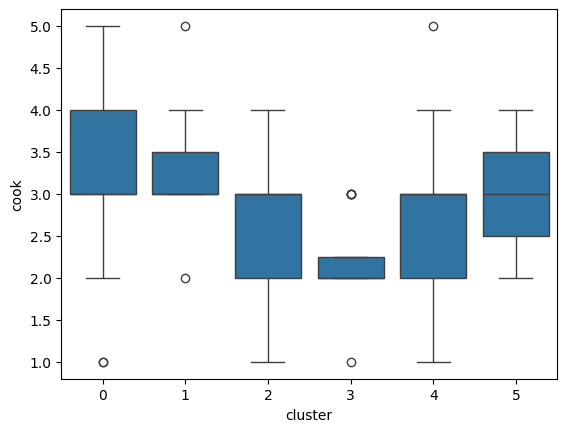

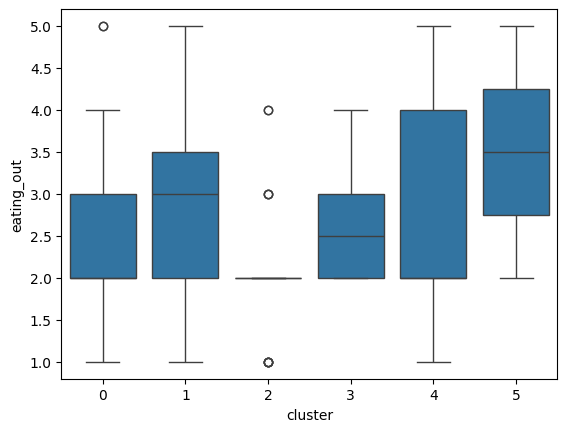

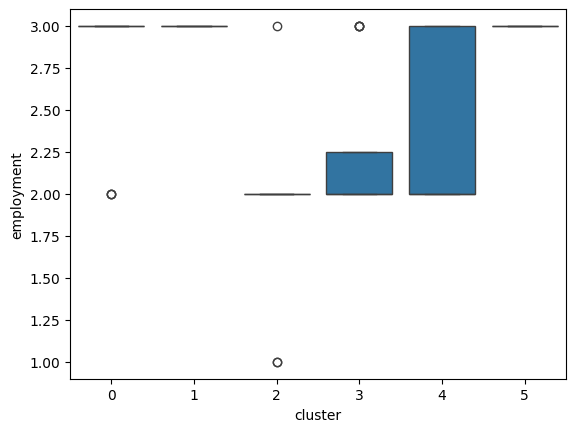

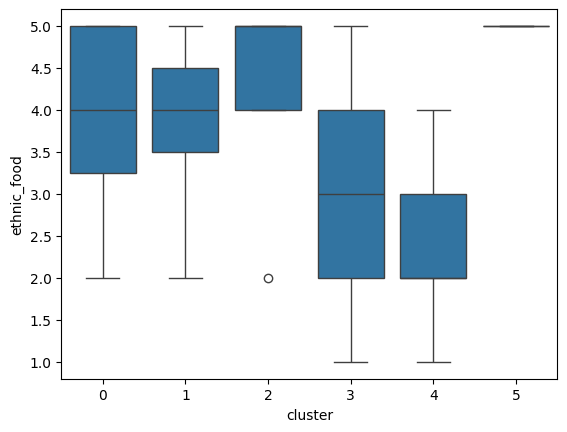

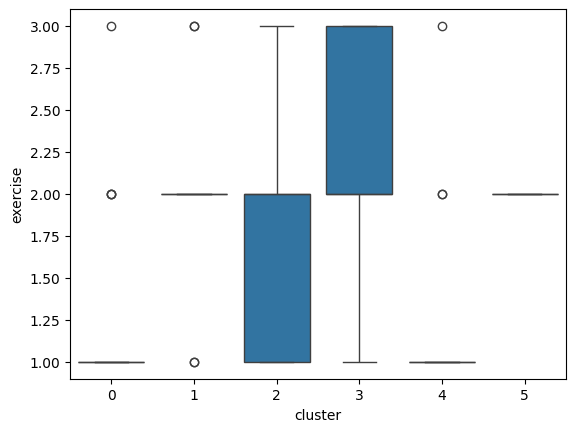

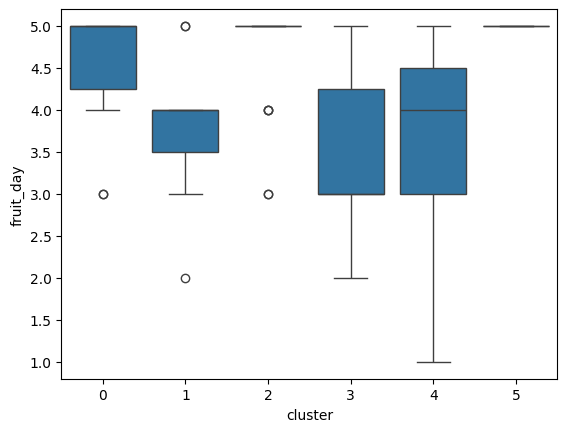

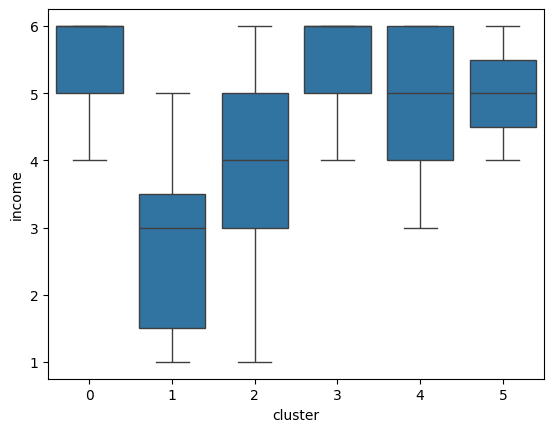

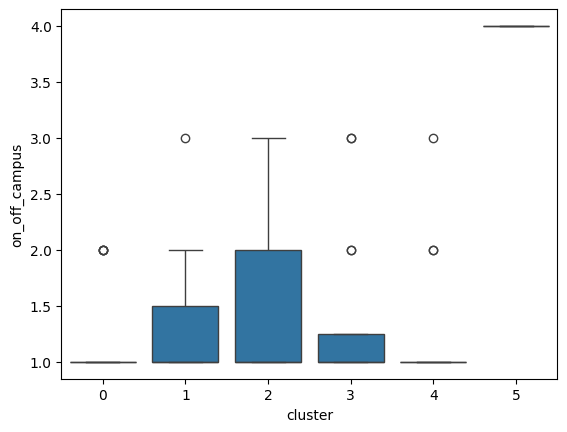

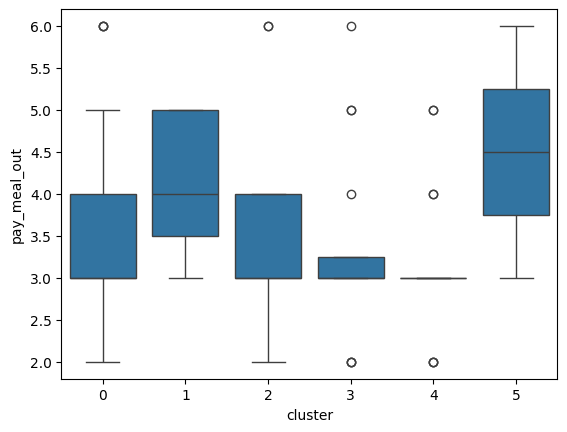

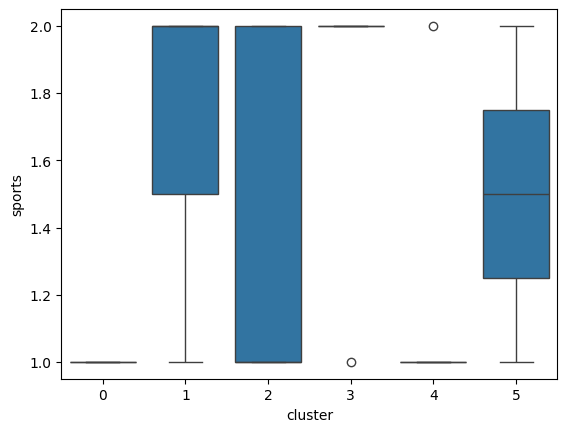

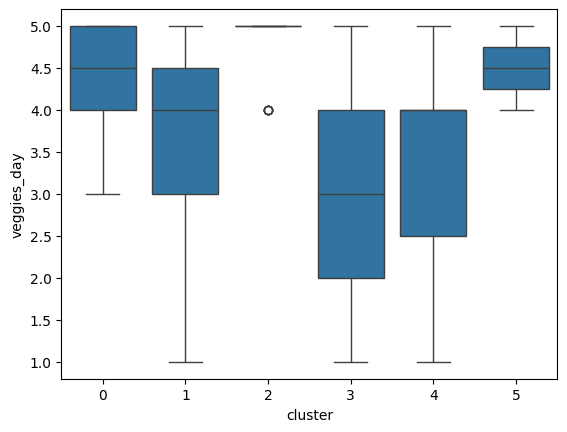

cluster
2    26
0    26
4    19
3    16
1    11
5     2
Name: count, dtype: int64

In [4]:
# take k = 6
kmeans6 = KMeans(n_clusters=6)
labels = kmeans6.fit_predict(X)
print(labels)
print(kmeans6.cluster_centers_)

df_clustered = clean_df.copy()
df_clustered["cluster"] = labels

centers = pd.DataFrame(
    kmeans6.cluster_centers_,
    columns=clean_df.columns
)
# centers: each row is a cluster. each column is 1 feature
# bc data is scaled, 0 is dataset avg, + is above avg and - is below avg
# eg:
#           income  eating_out  exercise
# cluster 2   1.20      0.85      -0.40

for col in ["cook", "eating_out", "employment", "ethnic_food", "exercise", "fruit_day", "income", "on_off_campus", "pay_meal_out", "sports", "veggies_day"]:
    seaborn.boxplot(x="cluster", y=col, data=df_clustered)
    plt.show()

df_clustered["cluster"].value_counts()


In [30]:
# foursquare api integration
coord = (x, y) = (53.52339920030489, -113.52633777322835)

load_dotenv()


headers = {'X-Places-Api-Version': '2025-06-17',
           'accept': 'application/json',
           'authorization': f'Bearer {os.environ.get("FSAPI_KEY")}'
           }
params = {"ll": f'{x},{y}',
          'fsq_category_ids': '4e67e38e036454776db1fb3a,4d954b06a243a5684965b473,4bf58dd8d48988d103941735',
          'radius': '50000'
          }

try:
    response = requests.get('https://places-api.foursquare.com/places/search', params=params, headers=headers)

    # parse json into dict
    data = response.json()
    # print(json.dumps(data, indent=4))

except requests.exceptions.RequestException as e:
    print(f"Error making api request: {e}")
    exit()

# print(response)
# print(data)
raw_houses_df = pd.json_normalize(data['results'])


houses_df = raw_houses_df[['latitude', 'longitude', 'name']]

print(f"length of houses_df {len(houses_df)}")
# print(houses_df.head())



def normalize(cat):
    return cat.lower().strip()

total_counts = []

for i in range(len(houses_df)):
    row = houses_df.iloc[i]
    print(row.latitude, row.longitude)

    headers = {'X-Places-Api-Version': '2025-06-17',
            'accept': 'application/json',
            'authorization': f'Bearer {os.environ.get("FSAPI_KEY")}'
            }
    params = {"ll": f'{row.latitude},{row.longitude}',
            'fsq_category_ids': '63be6904847c3692a84b9bb5,4bf58dd8d48988d1f9941735,4f4528bc4b90abdf24c9de85,4d4b7105d754a06378d81259',
            'radius': '5000'
            }
    """
    dining&drinking: 63be6904847c3692a84b9bb5
    food&bev retail: 4bf58dd8d48988d1f9941735
    sports&recreation: 4f4528bc4b90abdf24c9de85
    retail&shopping: 4d4b7105d754a06378d81259    
    """
    try:
        response = requests.get('https://places-api.foursquare.com/places/search', params=params, headers=headers)
        # parse json into dict
        data = response.json()
        # print(json.dumps(data, indent=4))
    except requests.exceptions.RequestException as e:
        print(f"Error making api request: {e}")
        exit()
    
    if not data['results']:
        continue


    raw_surrounding_df = pd.json_normalize(data['results'])


    surrounding_df = raw_surrounding_df[['latitude','longitude','categories','distance','name','location.locality','location.region','location.postcode','location.country']]

    # print(surrounding_df.head(10))
    # print("-------------------")



    final_df = surrounding_df
    final_df = final_df.dropna(subset=['name'])

    final_df['fsq_category_id'] = raw_surrounding_df['categories'].apply(lambda x: x[0]['fsq_category_id'])
    final_df['category'] = raw_surrounding_df['categories'].apply(lambda x: x[0]['name'])
    final_df.drop(columns=['categories'], inplace=True)
    # print(final_df.head(10))




    amenity_rules_map = {
        'grocery' : {'grocery', 'supermarket', 'farmers market'},
        'restaurant' : {"restaurant", "bistro", "cafe", "coffee", "bar", "pub",
    "joint", "diner", "grill", "taverna", "trattoria",
    "pizzeria", "eatery", "food", "bakery", "dessert", "ice cream", "café", "smoothie", "snack", "tea", "soup", "pastry", "speakeasy"},
        'sport_rec' : {"gym", "fitness", "studio"
        "sports club", "athletic field", "recreation center",
        "golf", "golf course",
        "tennis", "court",
        "soccer", "football", "basketball", "baseball", "hockey", "rugby",
        "swimming", "pool",
        "martial arts", "dojo", "boxing",
        "climbing", "yoga", "pilates",
        "skate", "skating",
        "ski", "snow",
        "track", "running",
        "surf", "sailing", "kayak", "rafting"},
        'shopping_retail': {'mall', 'store', 'market'}    
    }

    amenity_counts = {
        'grocery_count': 0,
        'restaurant_count': 0,
        'sport_rec_count': 0,
        'shopping_retail_count' : 0,
        'grocery' : [],
        'restaurant' : [],
        'sport_rec' : [],
        'shopping_retail' : [],

    }

    # print(final_df)
    for row in final_df.itertuples():
        # print(f'{row.category}: {row.name}')
        c = normalize(row.category)
        # print(c)
        counted=False
        for amenity, keys in amenity_rules_map.items():
            if any(k in c for k in keys):
                amenity_counts[f'{amenity}_count'] += 1
                amenity_counts[amenity].append(row.name)
                counted = True
                break
        # if not counted: print(f'{row.category}: {row.name}')

    total_counts.append(amenity_counts)

amenity_df = pd.DataFrame(total_counts)
# print(total_counts)
total_df = pd.concat([houses_df.reset_index(drop=True), amenity_df.reset_index(drop=True)], axis=1)
# print(total_df)



length of houses_df 10
53.51935528670875 -113.51892061589109
53.518428816785686 -113.52029318138224
53.51781384719587 -113.52026177812003
53.51406692567729 -113.51373939221408
53.51631466036103 -113.5055745451118
53.53850732196881 -113.52018633434476
53.53607441884744 -113.50970533865974
53.53994960022502 -113.52588502175594
53.540161336254954 -113.52455202198011
53.54078489577575 -113.52522709085598


In [31]:
features_df = total_df[["grocery_count", "restaurant_count", "sport_rec_count"]]
scaled_features_df = scaler.fit_transform(features_df)

kmeans_coord = KMeans(n_clusters=6)
labels = kmeans_coord.fit_predict(scaled_features_df)
print(labels)
print(kmeans_coord.cluster_centers_)

total_df["cluster"] = labels
print(total_df)

# using Folium
m = folium.Map(location=([total_df["latitude"].mean(),total_df["longitude"].mean()]), zoom_start=15)

colors = ['red', 'orange', 'pink', 'green', 'blue', 'purple']


g_1 = folium.FeatureGroup("group 1").add_to(m)
g_2 = folium.FeatureGroup("group 2").add_to(m)
g_3 = folium.FeatureGroup("group 3").add_to(m)
g_4 = folium.FeatureGroup("group 4").add_to(m)
g_5 = folium.FeatureGroup("group 5").add_to(m)
g_6 = folium.FeatureGroup("group 6").add_to(m)

folium.Marker(
    [x,y], 
    icon=folium.Icon(color='gray', icon="star"),
    popup=f"{x}, {y}",
).add_to(m)

for row in total_df.itertuples(index=False):
    cluster_num = row.cluster
    group = g_1
    if cluster_num == 0:
        group = g_1
    elif cluster_num == 1:
        group = g_2
    elif cluster_num == 2:
        group = g_3
    elif cluster_num == 3:
        group = g_4
    elif cluster_num == 4:
        group = g_5   
    elif cluster_num == 5:
        group = g_6
    


    display_df = pd.DataFrame(
        data=[[row.grocery_count, row.restaurant_count, row.sport_rec_count, row.shopping_retail_count], [row.grocery, row.restaurant, row.sport_rec, row.shopping_retail]],
        columns=["grocery", "restaurants", "sports/rec", "shopping/retail"]
    )
    display_df = display_df.rename(index={0: "Count", 1: "Details"})

    html = display_df.to_html(
    classes="table table-striped table-hover table-condensed table-responsive"
    )
    folium.Marker(
        [row.latitude,row.longitude], 
        icon=folium.Icon(colors[cluster_num], icon='home', prefix='fa'),
        popup=f"Name: {row.name} {html}",
    ).add_to(group)


m.save("map.html")



[3 0 0 0 2 1 1 1 1 4]
[[-1.09321633 -0.86204366  1.22474487]
 [ 0.46852129  1.05360891 -0.81649658]
 [-1.09321633  0.09578263 -0.81649658]
 [ 0.46852129 -1.81986994  1.22474487]
 [ 2.0302589   0.09578263 -0.81649658]
 [ 0.46852129  1.05360891 -0.81649658]]
    latitude   longitude                        name  grocery_count  \
0  53.519355 -113.518921     University Plaza Condos              3   
1  53.518429 -113.520293     Westcorp Properties Inc              2   
2  53.517814 -113.520262               Concord Tower              2   
3  53.514067 -113.513739                 Nerd Palace              2   
4  53.516315 -113.505575               Harvest Manor              2   
5  53.538507 -113.520186            LeMarchand Tower              3   
6  53.536074 -113.509705               Grandin Manor              3   
7  53.539950 -113.525885               The Mayflower              3   
8  53.540161 -113.524552             Grosvenor House              3   
9  53.540785 -113.525227  Serenit

c:\Users\Judyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
